# Deep Learning

Présenté par : Tristan Cazenave

Auteur : Aurélien Duvignac-Rosa

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/auduvignac/Deep-learning/blob/main/keras-basic/keras-basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## Introduction

Depuis 2012, on utilise des cartes graphiques pour entraîner des réseaux de neurones, ce qui a permis d'accroître les possibilités en *deep learning*.
Outre la puissance de calcul, l'amélioration des architectures des réseaux de neurones (fonction d'activation, couches d'attention dans les *transofrmers*, etc.) a permis de résoudre des problèmes de plus en plus complexes.
Les *frameworks* en accès libre permettent de mettre en oeuvre des réseaux de neurones de manière simple et efficace.
Enfin, de plus en plus de données sot disponibles, ce qui permet d'entraîner des réseaux de neurones sur des jeux de données de plus en plus importants.

Aplications :
- Computer Vision
- Generative Networks
- Recurrent Neural Networks
- Natural Language Processing
- Graph Neural Networks
- Computer Games

## Computer vision

### Convolutional neural networks

Application historique du *deep learning*. Les premiers réseaux convolutifs étaient utilisés pour encoder des chiffres manuscrits. Les réseaux convolutifs sont utilisés pour des tâches de classification d'images, de détection d'objets, de segmentation d'images, de reconnaissance de visages, etc.

Faibles nombres de paramètres, bonnes performances de généralisation, les réseaux convolutifs sont devenus des outils incontournables en vision par ordinateur.En général filtre 3x3 avec peu de paramètres, permettant ainsi de généraliser.

Depuis 2017 utilisation des *transformers*.

L'application des réseaux convolutifs à la détection de chiffre date de 1990. Le premier réseau convolutif a été introduit en 1998 par Yann LeCun.

Le redémarrage des réseaux de neurones date de 2012 : AlexNet.

Vision transformer : *transformer* appliqué à la vision par ordinateur.

### Generative Networks (Réseaux génératifs)

*Autoencoder* ;

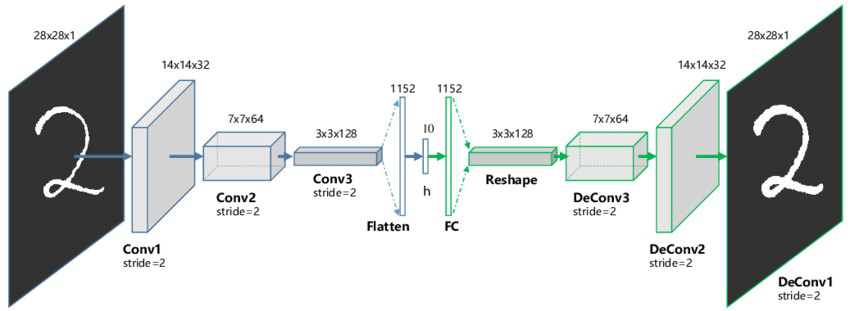

-  réduction de dimensionalité ;
- compression de données ;
- débruitage d'images ;
- etc.
 
*Generative Adversarial Networks (GAN)* ;

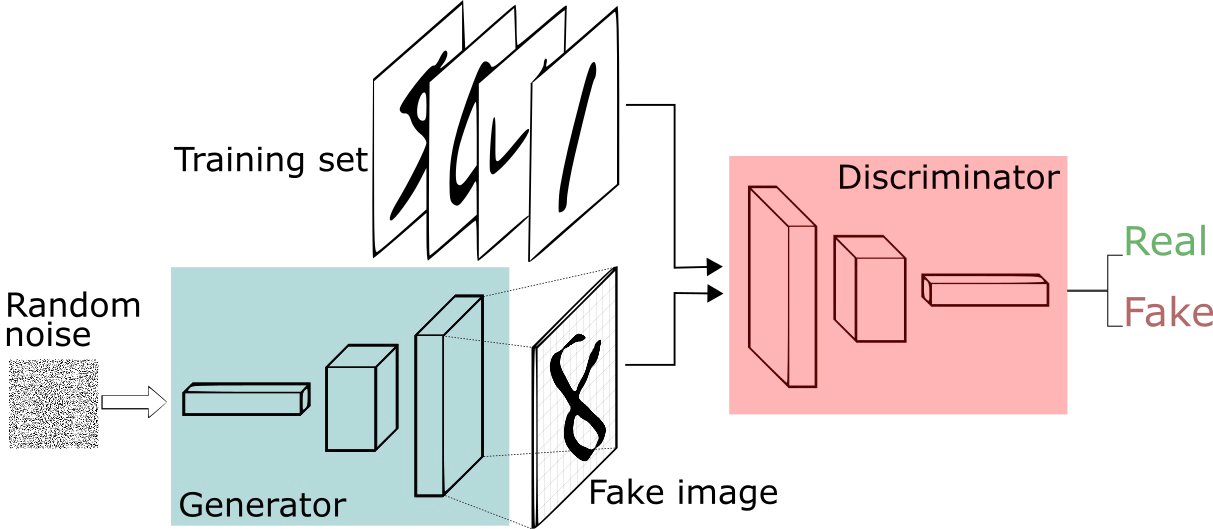


- Génération d'images à partir de texte ;
- Transformation d'images ;
- etc.

*Generative Pre trained Transformers*

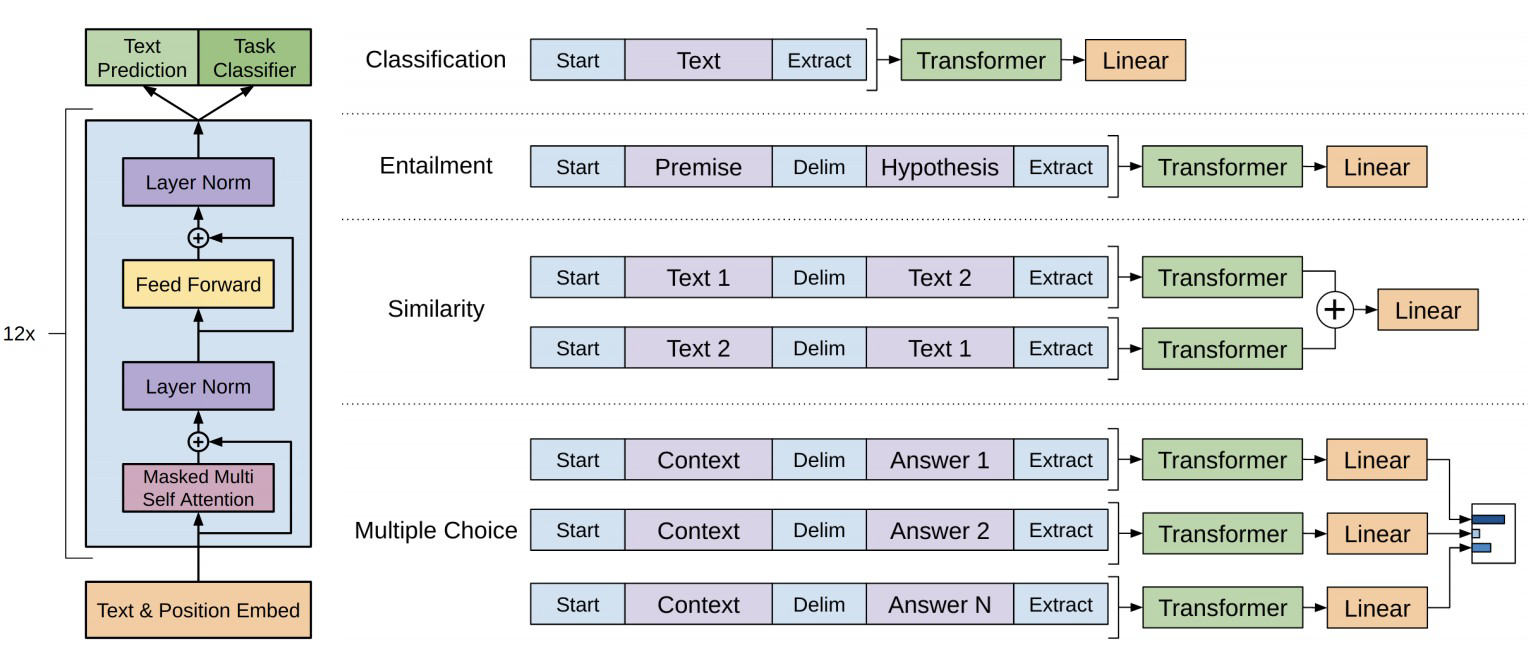

### Natural Language Processing

*Recurrent Neural Networks (RNN)*

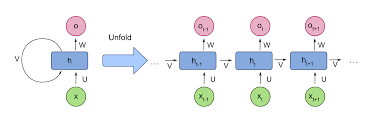

Rétropopagation à travers le temps.

*Long short terme memory (LSTM)*

Plus efficace en termes de mémorisation à long terme.

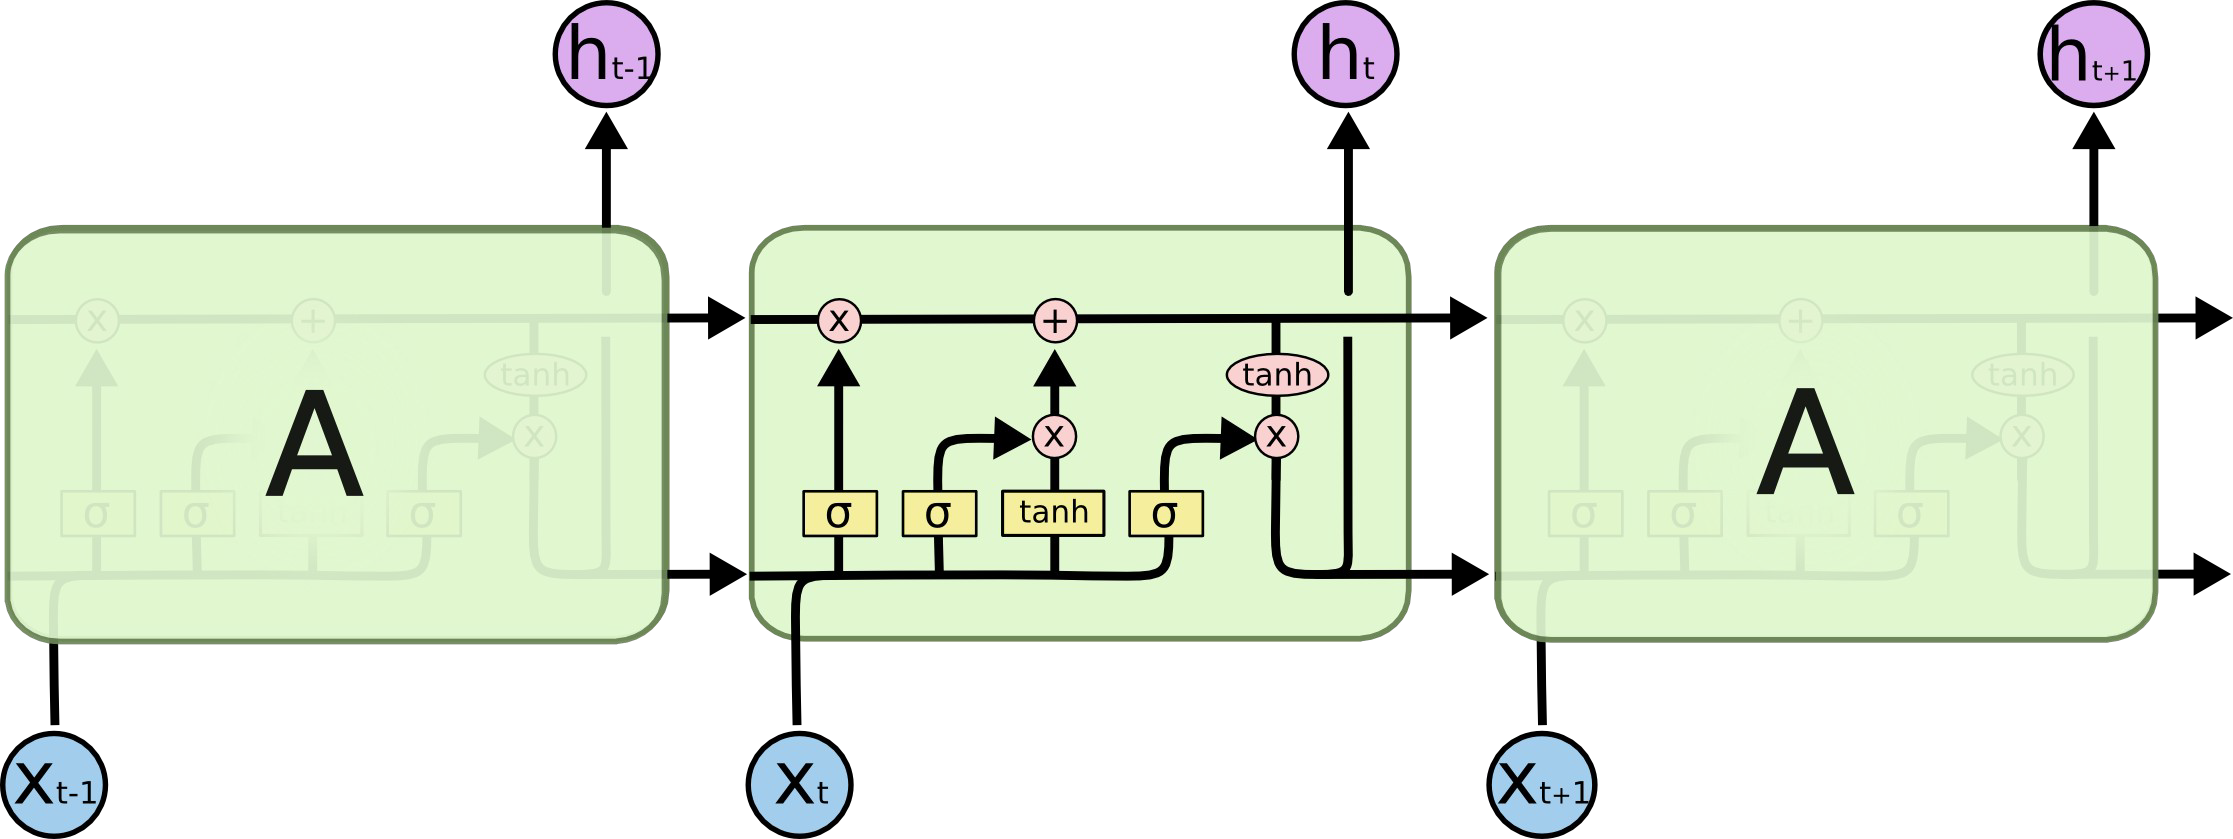

*Grated Recurrent Unit (GRU)*

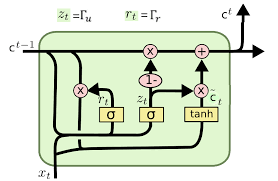


Courbe de la taille des modèles en fonction du temps.

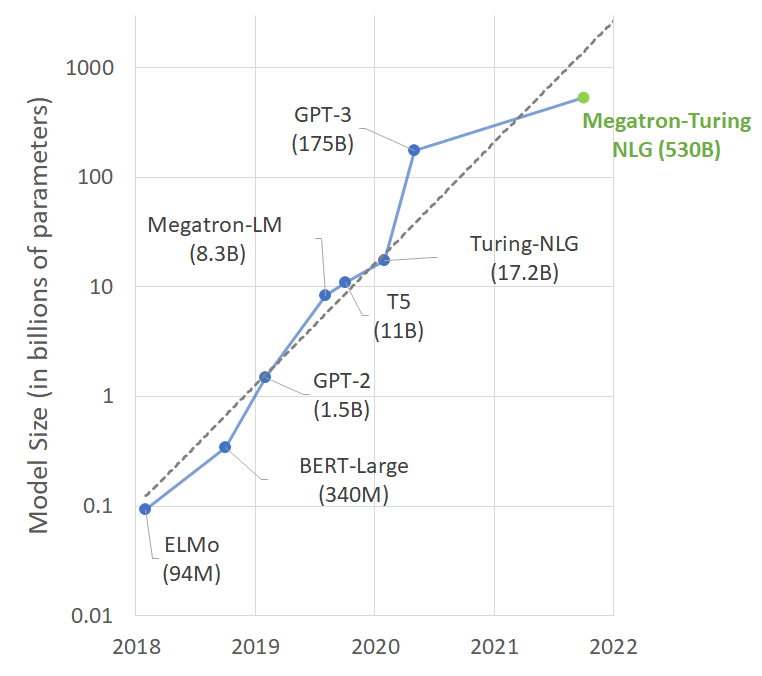


### Graph Neural Networks

Architectures sous forme de graphes.

#### GNN 

Réseaux qui transforment les graphes en graphes.

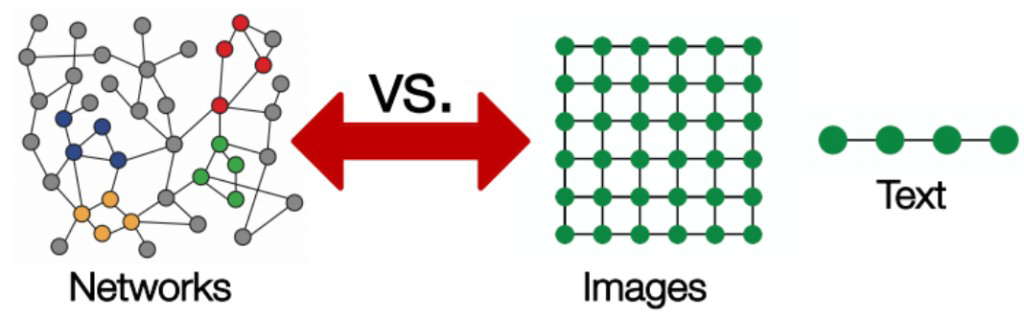

#### GCN (Graph Convolutional Networks)

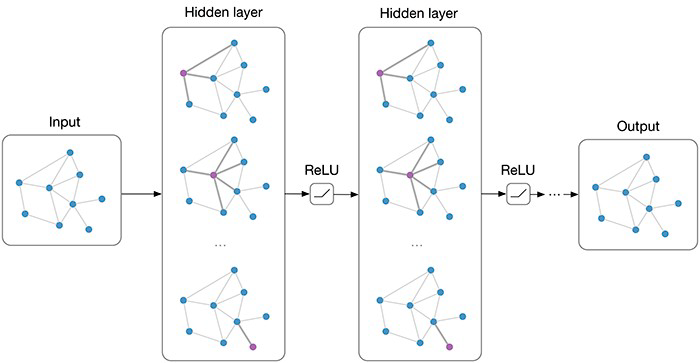

#### Alphago

Basé sur la recherche de **monte-carlo tree search**.

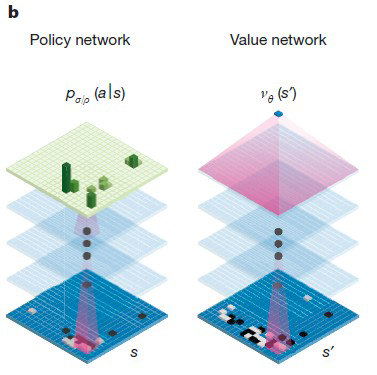

Alphago apprenait à partir de parties de joueur professionnel à faire une politique de jeu.

#### Alphazero

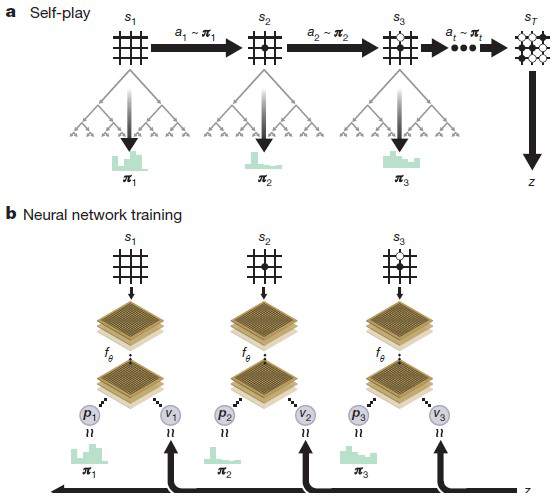

Juste en jouant contre lui-même il a pu dépasser Alphago.

#### Polygames

Application d'*Alphazero* à d'autres jeux (*average pooling*).

#### Alphastar

Application à Starcraft.

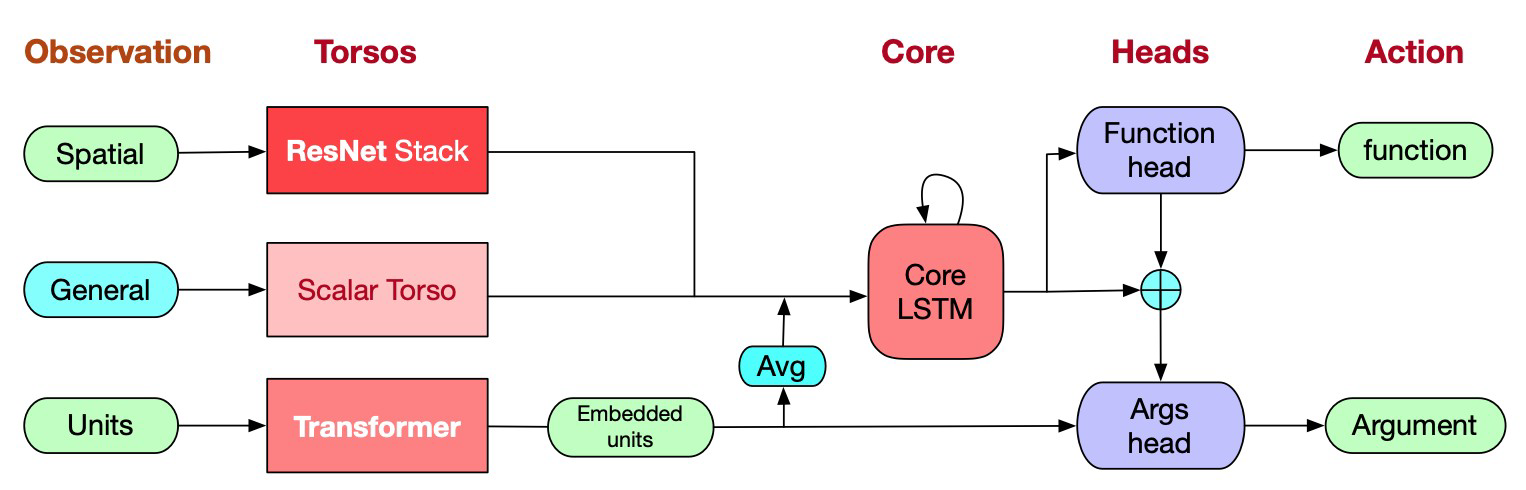


### Historique

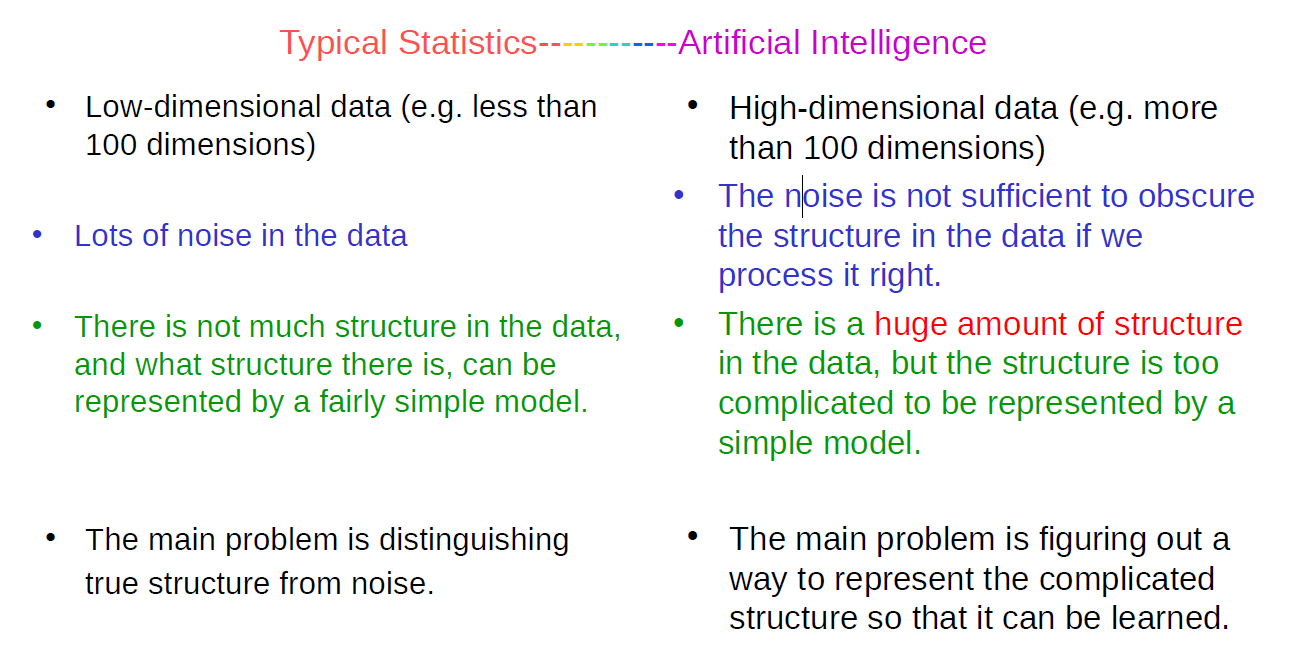

Ce qui fait qu'un réseau de neurones n'est pas linéaire c'est la fonction d'activation.

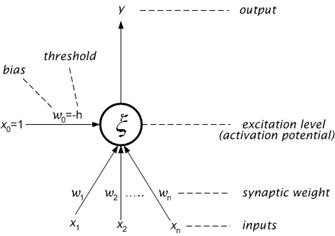

Architecture :

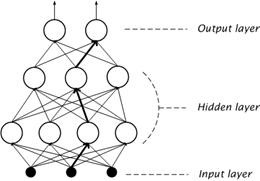

Fonction sigmoïde : $\sigma(x) = \frac{1}{1+e^{-x}}$

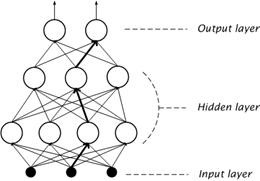

Désormais la fonction d'activation la plus utilisée est la fonction ReLU (Rectified Linear Unit) : $f(x) = max(0,x)$ (2012), même si l'on a fait mieux depuis.

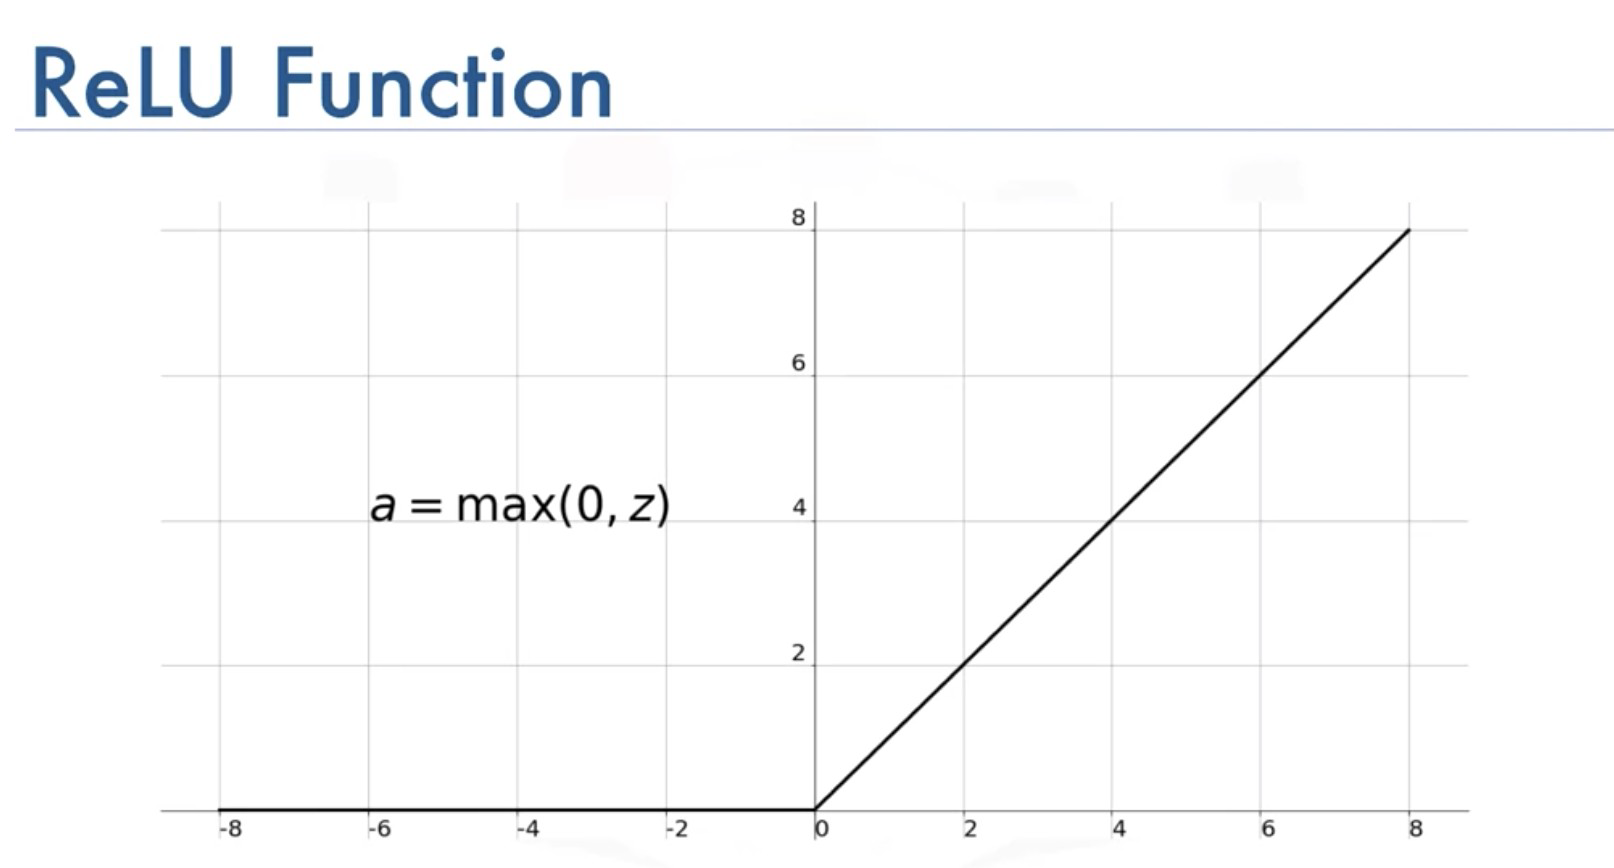

Softmax : $\sigma(x)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}$

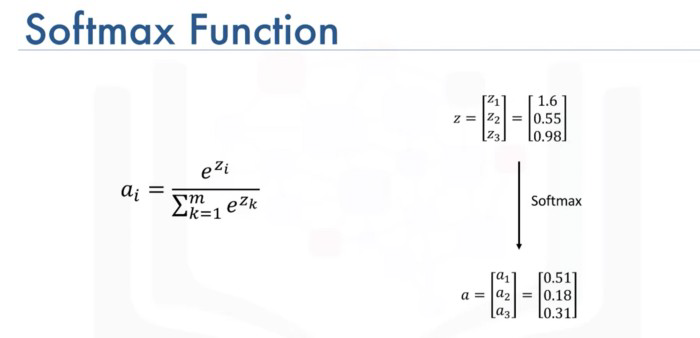

Synthèse :

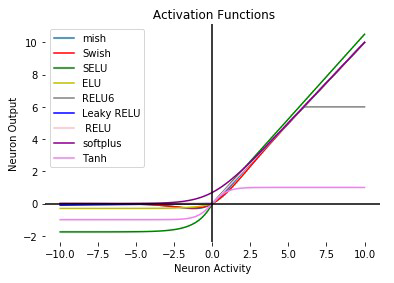

Ces réseaux sont entraînés par rétropropagation du gradient.

### Rétropropagation du gradient

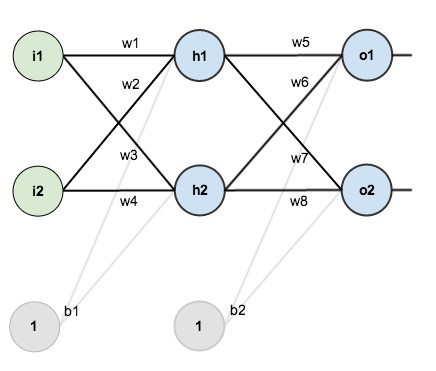

On initialise les poids entre 0 et 1.

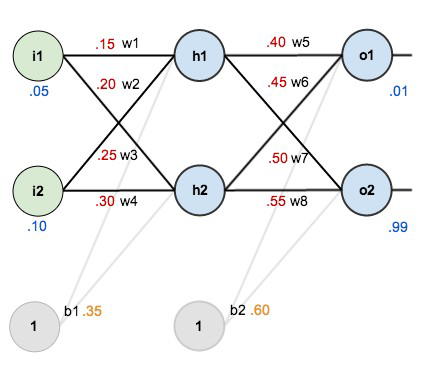

The goal of backpropagation is to optimize the weights so that the neural network can learn how to correctly map arbitrary inputs to outputs.

Here’s how we calculate the total net input for h1:
$neth1 = w1 \times i1 + w2 \times i2 + b1 \times 1$
neth1 = 0.15 * 0.05 + 0.2 * 0.1 + 0.35 * 1 = 0.3775
We then squash it using the sigmoid function to get the output of h1 :
$outh1 = \frac{1}{(1+e^{-neth1})} = 1/(1+e^-0.3775) = 0.593269992$
Carrying out the same process for h2 we get : outh2 = 0.596884378


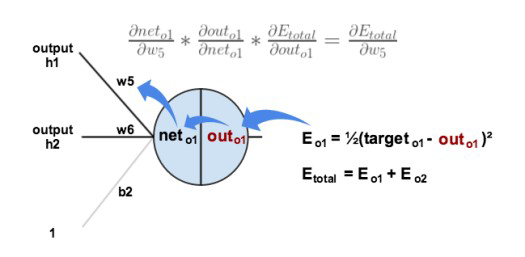

Couches cachées :
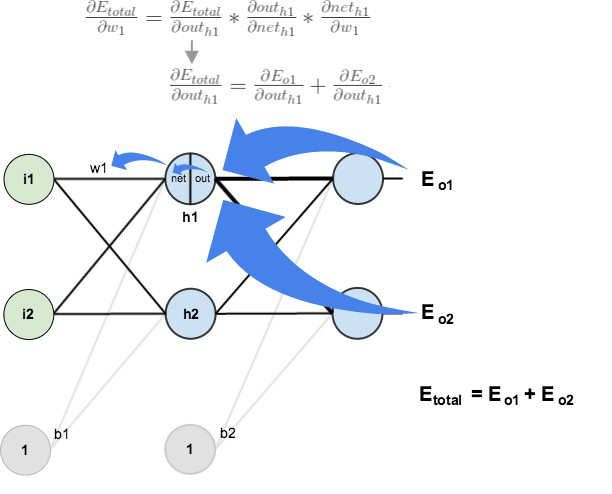

```python
import math
w1 = 0.4
w2 = 0.6
w3 = 0.1
i1 = 0.1
i2 = 0.5
out = 0.2
eta = 0.5
def sigmoid (x):
return 1.0 / (1.0 + math.exp (-x))
# forward
neth = w1 * i1 + w2 * i2
outh = sigmoid (neth)
neto = w3 * outh
o = sigmoid (neto)

# Backpropagation
for i in range (1000):
  neth = w1 * i1 + w2 * i2
  outh = sigmoid (neth)
  neto = w3 * outh
  o = sigmoid (neto)
  err = 0.5 * (out - o) ** 2
  print (err, o)
  dw3 = (o - out) * o * (1.0 - o) * outh
  dw2 = (o - out) * o * (1.0 - o) * w3 * outh * (1.0 - outh) * i2
  dw1 = (o - out) * o * (1.0 - o) * w3 * outh * (1.0 - outh) * i1
  w3 = w3 - eta * dw3
  w2 = w2 - eta * dw2
  w1 = w1 - eta * dw1
```

Classification binaire : Cross entropy

## XOR

In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
import tensorflow as tf
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([[0.],[1.],[1.],[0.]])
model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
sgd = SGD(learning_rate=0.1)
model.compile(loss='mse', optimizer=sgd)
model.fit(X, y, verbose=1, batch_size=1, epochs=1000)
print(model.predict(X))

Epoch 1/1000


C:\Users\Aurel\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2762  
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2745 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3329 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3228 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3129 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.2348  
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3036 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.2614  
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2743 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.2639  
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2410 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2949 
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2922 
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2816 
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.2712  
Epoch 16/1000
4/

Explication du code précédent.

- `model = Sequential()` : modèle séquentiel
- `model.add(Dense(8, input_dim=2))` : couche dense de 8 neurones.
- `model.add(Activation('relu'))` : fonction d'activation ReLU.
- `model.add(Dense(1))` : couche dense de 1 neurone.
- `model.add(Activation('sigmoid'))` : fonction d'activation sigmoïde.
- `sgd = SGD(learning_rate=0.1)` : algorithme d'optimisation.
- `model.compile(loss='mse', optimizer=sgd)` : compilation du modèle.
- `model.fit(X, y, verbose=1, batch_size=1, epochs=1000)` : entraînement du modèle.

## MNIST

Le problème que nous cherchons à résoudre ici est de classer des images en niveaux de gris de chiffres manuscrits (**28 × 28 pixels**) en **10 catégories** (de **0 à 9**). Nous allons utiliser l’ensemble de données **MNIST**, un classique de la communauté du machine learning, qui existe depuis presque aussi longtemps que le domaine lui-même et qui a été **intensivement étudié**.  

Il s'agit d'un ensemble de **60 000 images d'entraînement** et **10 000 images de test**, assemblé par le **National Institute of Standards and Technology (NIST)** dans les années 1980.  

On peut considérer la résolution de **MNIST** comme l’équivalent du **"hello world"** en **deep learning** — c’est ce que l’on fait pour vérifier que nos algorithmes fonctionnent comme prévu.  

En tant que praticien du machine learning, vous verrez **MNIST apparaître encore et encore** dans des articles scientifiques, des billets de blog, etc. Vous pouvez voir des exemples de MNIST dans la **figure 2.1**.  

**Classes et étiquettes**  

En machine learning :  
- Une *catégorie* dans un problème de classification est appelée une **classe**.  
- Les points de données sont appelés **échantillons**.  
- La classe associée à un échantillon spécifique est appelée une **étiquette** (*label*).

## Entraîner un petit réseau dense sur les données MNIST

### 1. Préparer les données :
- **Entrées** = vecteurs de nombres réels (entre **0.0 et 1.0**) de taille **28×28**  
- **Étiquettes** = vecteurs de nombres réels de taille **10**  
  - Contient **neuf 0 et un 1** à l’index correspondant à l’étiquette correcte

```python
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```

### 2. Définir le réseau :
- **Architecture :**  
  - Réseau entièrement connecté (**fully connected**)  
  - **28×28 entrées** → **10 sorties**

**Remarque :** on utilise la fonction d'activation *softmax* et la *categorical crossentropy* pour que le réseau prédise une distribution de probabilité sur les 10 classes.

```python	
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))
```

### 3. Définir la fonction de perte et l’optimiseur

```python
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
```

### 4. Entraîner le réseau

```python
network.fit(train_images, train_labels, epochs=5, batch_size=128)
```

### 5. Tester le réseau

```python
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
```

### 6. Afficher une image du jeu de test et la classe prédite

```python
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
img = test_images [0].reshape ((1, 28*28))
print (network.predict(img))
```


Epoch 1/5


C:\Users\Aurel\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8734 - loss: 0.4361
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9652 - loss: 0.1162
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9785 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0528
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9884 - loss: 0.0377
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0717
test_acc: 0.9805999994277954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
La valeur associé à l'image précédente est 7.


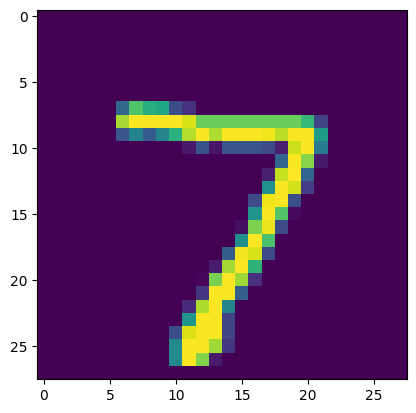

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) # 28*28=784, 60000 images
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[0])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
img = test_images[0].reshape ((1, 28*28))
l = network.predict(img)
print(f"La valeur associé à l'image précédente est {np.argmax(l)}.")

### Explications détaillées du code

#### Importation des bibliothèques

```python
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
```

#### Chargement des données

```python
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```

#### Prétraitement des données

**Objectif :** Transformer les images MNIST de leur format original (28 × 28 pixels) en vecteurs aplatis (*flattened*) de longueur 784.

```python
train_images = train_images.reshape((60000, 28 * 28))
```

`train_images` :
  - tableau NumPy contenant 60000 images de 28 × 28 pixels ;
  - Sa forme initiale est `(60000, 28, 28)`, soit un tableau 3D où chaque image est une matrice de 28 x 28.

`reshape((60000, 28 * 28))` :
  - Transforme `train_images` en une matrice 2D de 60000 lignes et 784 colonnes ;
  - Chaque ligne représente une image aplatie en un vecteur de 784 pixels.

```python
train_images = train_images.astype('float32') / 255
```


## Classification binaire

## Classification binaire

La **classification binaire** (ou **classification à deux classes**) est l’un des problèmes de machine learning les plus couramment appliqués.  
Dans cet exemple, vous apprendrez à **classifier des critiques de films** en **positives ou négatives**, en vous basant sur le contenu textuel des avis.

### *Le jeu de données IMDB*

Vous travaillerez avec le **jeu de données IMDB**, un ensemble de **50 000 critiques de films fortement polarisées** provenant de l'**Internet Movie Database**.  
Les critiques sont réparties en **25 000 avis pour l’entraînement** et **25 000 avis pour les tests**, chaque ensemble contenant **50% de critiques négatives et 50% de critiques positives**.

#### 1. Charger les données

```python
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
```

#### 2. Prétraiter les données

**Objectif :** Transformer les listes d’entiers en tenseurs que le réseau de neurones peut traiter.

```python
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range (len (sequences)):
    for j in range (len (sequences [i])):
      results [i] [sequences [i] [j]] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
```

#### 3. Prétraiter les étiquettes

```python
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
```

#### 4. *View Reviews*

```python
word_index = imdb.get_word_index() # word_index est un dictionnaire qui mappe les mots aux indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # on inverse les clés et les valeurs
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # on décode la première critique
```

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range (len (sequences)):
    for j in range (len (sequences [i])):
      results [i] [sequences [i] [j]] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

word_index = imdb.get_word_index() # word_index est un dictionnaire qui mappe les mots aux indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # on inverse les clés et les valeurs
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # on décode la première critique

### Exercice
Entrainer un petit réseau dense sur les données *IMDB* :
– Définir le réseau
- Définir la fonction de perte et l’optimiseur
- Définir un ensemble de validation
- Entraîner le réseau en utilisant un ensemble de validation

#### 1. Définir le réseau

```python
network = Sequential()
network.add(Dense(16, activation='relu', input_shape=(10000,)))
network.add(Dense(16, activation='relu'))
network.add(Dense(1, activation='sigmoid'))
```

#### 2. Définir la fonction de perte et l’optimiseur

```python
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
```

#### 3. Définir un ensemble de validation

```python
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
```

#### 4. Entraîner le réseau

```python
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
```

#### 5. Afficher les résultats (visualisation de la fonction de perte)

```python
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
```

```python
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
```

#### 6. Afficher les résultats (visualisation de la précision)

```python
plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
```


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6794 - loss: 0.6103 - val_accuracy: 0.8596 - val_loss: 0.4074
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8979 - loss: 0.3424 - val_accuracy: 0.8808 - val_loss: 0.3190
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9199 - loss: 0.2531 - val_accuracy: 0.8726 - val_loss: 0.3156
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9396 - loss: 0.1972 - val_accuracy: 0.8908 - val_loss: 0.2741
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9489 - loss: 0.1666 - val_accuracy: 0.8890 - val_loss: 0.2746
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9561 - loss: 0.1402 - val_accuracy: 0.8865 - val_loss: 0.2855
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9640 - loss: 0.1211 - val_accuracy: 0.8785 - val_loss: 0.3062
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9709 - loss: 0.1028 - val_accuracy: 0.8824 - v

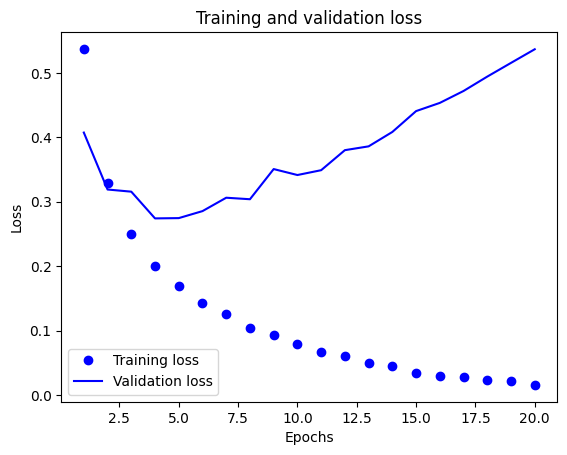

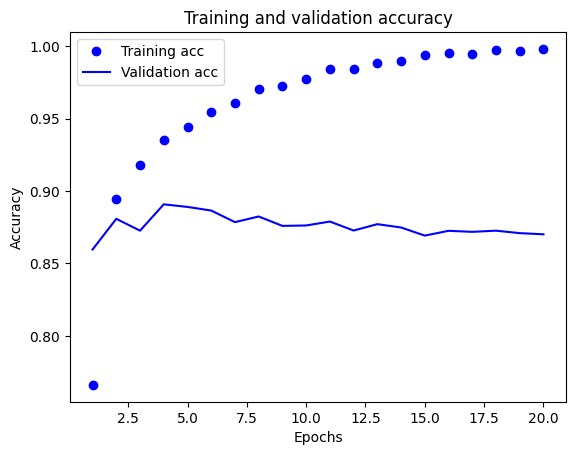

In [4]:
network = Sequential()
network.add(Dense(16, activation='relu', input_shape=(10000,)))
network.add(Dense(16, activation='relu'))
network.add(Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A partir des résultats obtenus, on peut voir que le modèle commence à surapprendre après 4 époques. On peut donc entraîner le modèle sur 4 époques et obtenir un modèle plus performant.
Pour empêcher l'*overfitting* l'objectif est de faire appel à des poids moins disparates en faisant appel à la régularisation L2.

### Weight Regularization

Dans Keras, la régularisation des poids est ajoutée en passant des instances de régularisation de poids aux couches sous forme d’arguments  : *keyword arguments*.

```python
from tensorflow.keras import regularizers
model = Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu',
input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

`regularizer_l2(0.001)` signifie que chaque coefficient de la matrice de poids de la couche ajoutera 0.001 × valeur_du_coefficient à la perte totale du réseau.

À noter que cette pénalité n'est appliquée qu'au moment de l'entraînement, ce qui signifie que la perte du réseau sera bien plus élevée pendant l'entraînement que pendant le test.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6882 - loss: 0.6388 - val_accuracy: 0.8725 - val_loss: 0.4258
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8958 - loss: 0.3773 - val_accuracy: 0.8864 - val_loss: 0.3517
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9198 - loss: 0.2918 - val_accuracy: 0.8906 - val_loss: 0.3330
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9381 - loss: 0.2460 - val_accuracy: 0.8880 - val_loss: 0.3285
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9485 - loss: 0.2234 - val_accuracy: 0.8783 - val_loss: 0.3507
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9543 - loss: 0.2013 - val_accuracy: 0.8781 - val_loss: 0.3541
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9591 - loss: 0.1888 - val_accuracy: 0.8840 - val_loss: 0.3442
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9646 - loss: 0.1785 - val_accuracy: 0.8799 - v

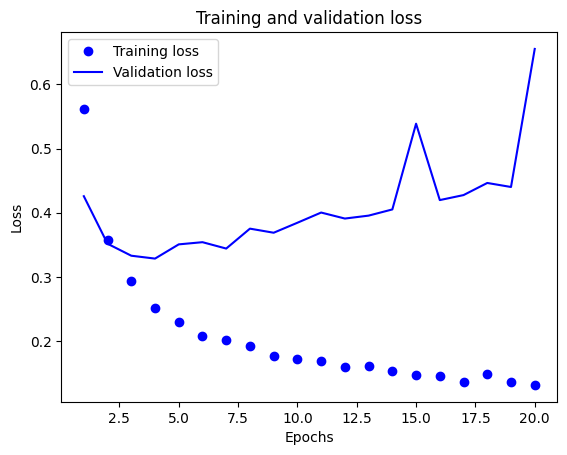

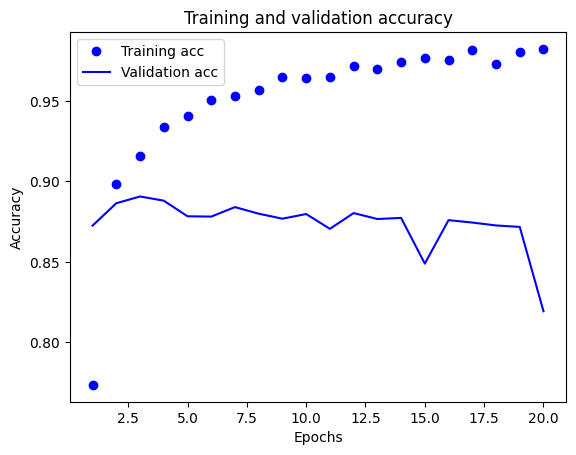

In [5]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers
model = Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu',
input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dropout

Mettre aléatoirement à 0 des activations de neurones, permettant ainsi d'inhiber des neurones et forcer le réseau à apprendre des représentations plus robustes, généraliser mieux et permettre une meilleure redondance.

```python
tensorflow.keras.layers.Dropout(rate, noise_shape=None, seed=None)
```

`rate` : fraction des entrées à mettre à 0.

```python
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',
input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
```

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5891 - loss: 0.6618 - val_accuracy: 0.8471 - val_loss: 0.4861
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7679 - loss: 0.5117 - val_accuracy: 0.8597 - val_loss: 0.3915
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8332 - loss: 0.4151 - val_accuracy: 0.8751 - val_loss: 0.3255
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8651 - loss: 0.3491 - val_accuracy: 0.8790 - val_loss: 0.3018
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8919 - loss: 0.2969 - val_accuracy: 0.8841 - val_loss: 0.2885
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9022 - loss: 0.2684 - val_accuracy: 0.8893 - val_loss: 0.2712
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9167 - loss: 0.2419 - val_accuracy: 0.8875 - val_loss: 0.2772
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9312 - loss: 0.2041 - val_accuracy: 0.8878 - v

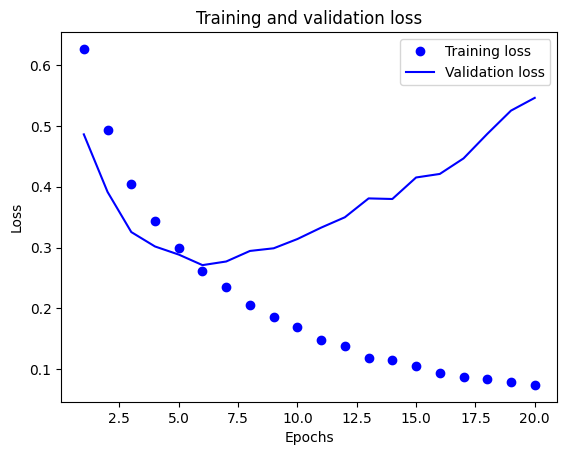

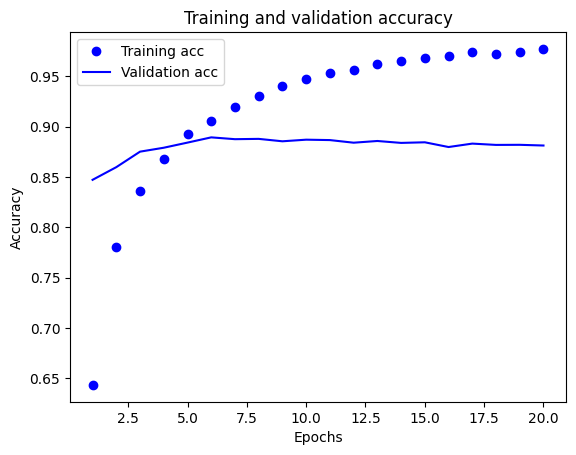

In [6]:
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',
input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() #Clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()